<a href="https://colab.research.google.com/github/afeef2003/Social-Media-Sentiment-Analysis/blob/main/Begum_SSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Lets Begin***

**import necessary libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/Tweets.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import matplotlib.pyplot as plt

**Load Dataset using pandas**

In [ ]:
dff = pd.read_csv("/content/Tweets.csv")

**now we take the short overview of the dataset**

In [ ]:
dff.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
dff.shape

(14640, 15)

In [ ]:
df = dff.loc[:,['airline_sentiment','text']]

In [ ]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: xlabel='airline_sentiment'>

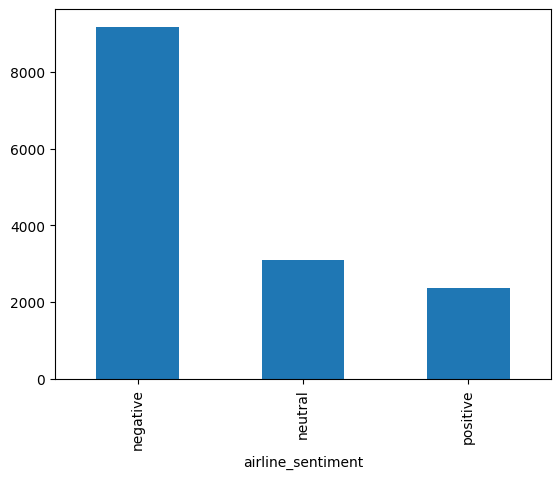

In [ ]:
df['airline_sentiment'].value_counts().plot(kind='bar')

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
stem = PorterStemmer()

In [ ]:
uni = dff['airline'].unique()
uni = [x.split() for x in uni]
uni = ["".join(x) for x in uni]
uni = [x.lower() for x in uni]

In [ ]:
def func(x):
    x = re.sub("[^a-zA-Z]"," ",x)
    x = x.split()
    x = [i.strip() for i in x]
    x = [stem.stem(i) for i in x if (i not in set(stopwords.words('english')) or i not in uni)]
    return " ".join(x)

In [ ]:
df['text'] = df['text'].apply(func)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
mm = df['text'].head(1000)

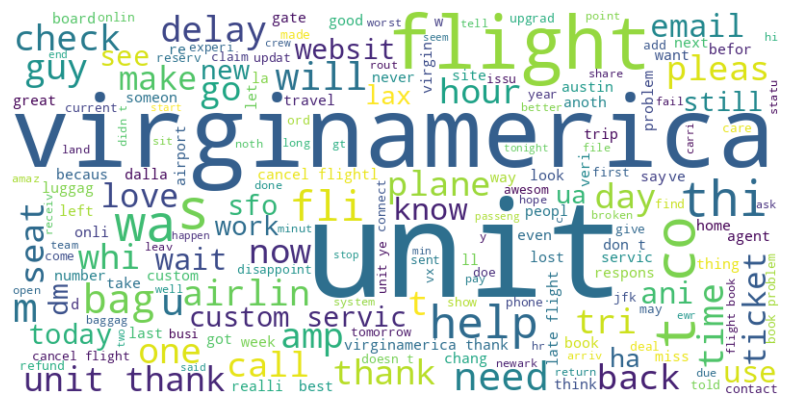

In [ ]:
from wordcloud import WordCloud
text = ' '.join(mm)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
model = TfidfVectorizer(max_features=1000)

In [ ]:
text = model.fit_transform(df['text'])

In [ ]:
array = text.toarray()

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(array,df['airline_sentiment'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9)

In [ ]:
model.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
preds = model.predict(x_te)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
accuracy_score(y_te,preds)

0.7472677595628415

The End